In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as pl
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
import pickle
from ocolorutils import MakeParula
from matplotlib.pylab import rcParams
parula = MakeParula()

In [2]:
%matplotlib inline

In [3]:
maindir='/disk02/UNCERTAINTIES/Monte-Carlo/MODIS/DATA/Chesapeake/L2/'

In [ ]:
fnNoNir = maindir + 'NoNIR/A2003118181500.L2'
noNIRSaveDir = maindir+'NoNIR/Maps/'

In [4]:
fnStd = maindir + 'Standard/A2003118181500.L2'
stdSaveDir = maindir + 'Standard/Maps/'

In [4]:
nflh_direct_nonir = pickle.load(open(maindir + 'NoNIR/nflh.npy','rb'))

In [5]:
nflh_unc_direct_nonir = pickle.load(open(maindir + 'NoNIR/nflhUnc.npy','rb'))

In [5]:
nflh_direct_std = pickle.load(open(maindir+'Standard/nflh.npy','rb'))
nflh_unc_direct_std = pickle.load(open(maindir + 'Standard/nflhUnc.npy','rb'))

In [39]:
nflh_unc_rho_nonir.min(),nflh_unc_rho_nonir.max()

(0.0, 0.00090303022)

In [40]:
nflh_unc_rho_std.min(),nflh_unc_direct_std.max()

(0.0, 0.51612747)

In [ ]:
F0 = 1500
nflh_unc_rho_nonir = nflh_unc_direct_nonir / F0 * np.pi
nflh_rho_nonir = nflh_direct_nonir / F0 * np.pi
nflh_rho_std = nflh_direct_std / F0 * np.pi
nflh_unc_rho_std = nflh_unc_direct_std / F0 * np.pi

In [5]:
with nc.Dataset(fnStd) as ds:
    gpNavV = ds.groups['navigation_data'].variables
    gpGeoV = ds.groups['geophysical_data'].variables
    lats = gpNavV['latitude'][:]
    lons = gpNavV['longitude'][:]
    chlora = gpGeoV['chlor_a'][:]
    chloraUnc = gpGeoV['chlor_a_unc'][:]
    rrs412 = gpGeoV['Rrs_412'][:]
    rrs412Unc = gpGeoV['Rrs_unc_412'][:]
    rrs531 = gpGeoV['Rrs_531'][:]
    rrs531Unc = gpGeoV['Rrs_unc_531'][:]
nflh = pickle.load(open(maindir+'Standard/nflh.npy','rb'))
nflh_unc = pickle.load(open(maindir + 'Standard/nflhUnc.npy','rb'))

In [9]:
with nc.Dataset(fnNoNir) as ds:
    gps = ds.groups
    rrsunc667 = gps['geophysical_data'].variables['Rrs_unc_667'][:]
    rrsunc678 = gps['geophysical_data'].variables['Rrs_unc_678'][:]
    pnflh_unc_rho = np.sqrt((rrsunc667)**2 + (rrsunc678)**2)*np.pi
    '''chlora = gps['geophysical_data'].variables['chlor_a'][:]
    chlora_unc=gps['geophysical_data'].variables['chlor_a_unc'][:]
    nflh_unc = gps['geophysical_data'].variables['nflh_unc'][:]
    nflh_unc_rho = nflh_unc / F0 * np.pi
    nflh = gps['geophysical_data'].variables['nflh'][:]
    nflh_rho = nflh / F0 * np.pi
    lats = gps['navigation_data'].variables['latitude'][:]
    lons = gps['navigation_data'].variables['longitude'][:]'''

/disk01/home/ekarakoy/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


In [6]:
lonRng=(-77.25,-75.60)
latRng=(36.75,39.64)

In [118]:
chlmask = np.ma.make_mask(chlora>0.3)

In [119]:
nflh_unc_rho_nonir_ma_chl = chlmask + nflh_unc_rho_nonir.mask
nflh_unc_rho_std_ma_chl = chlmask + nflh_unc_rho_std.mask
nflh_unc_rho_nonir_chl03 = np.ma.array(nflh_unc_rho_nonir,copy=True,mask=nflh_unc_rho_nonir_ma_chl)
nflh_unc_rho_std_chl03 = np.ma.array(nflh_unc_rho_std,copy=True,mask=nflh_unc_rho_std_ma_chl)

In [126]:
pnflh_unc_rho_ma_chl=  chlmask+pnflh_unc_rho.mask
pnflh_unc_rho_chl03 = np.ma.array(pnflh_unc_rho,copy=True,mask=pnflh_unc_rho_ma_chl)

In [83]:
ma2=np.reshape(np.random.randint(0,2,size=25),(5,5))
ma3 = ma.copy()
ma2=np.ma.make_mask(ma2)
print(ma2)

[[False False  True  True False]
 [False False False  True False]
 [False False  True False False]
 [False False  True False False]
 [False  True False False False]]


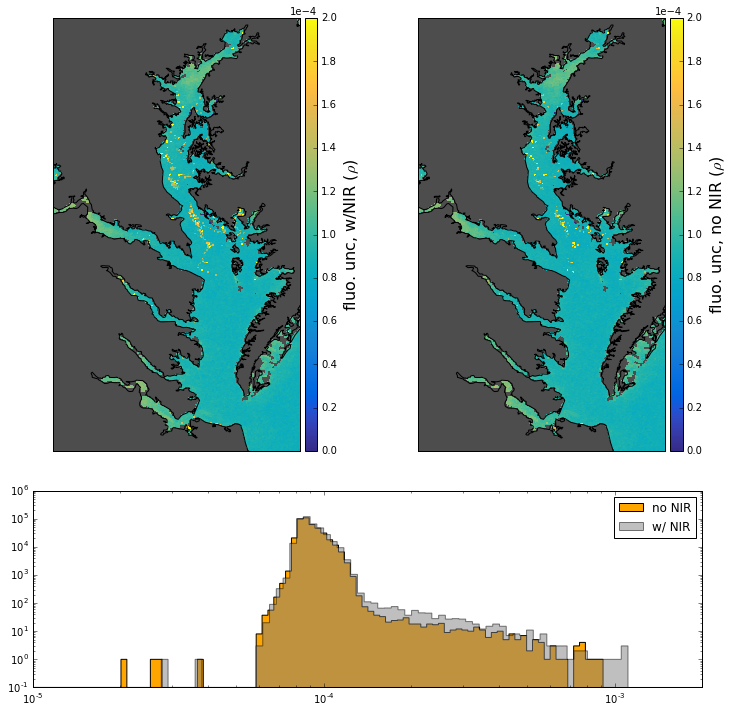

In [68]:
import matplotlib.gridspec as gridspec
# --- COMPARING nflh unc ACROSS RUN TYPES
rng2=(0,2e-4)
figsn = pl.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,2)
ax1 = pl.subplot(gs[:-1,0])
ax2 = pl.subplot(gs[:-1,1])
ax3 = pl.subplot(gs[2,:])
# --- MAP1: w/ NIR ----------
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax1)
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn = pl.cm.ScalarMappable()
ssn.set_cmap(parula)
ssn.set_clim(rng2)
imnflhUncStd = msn.pcolormesh(lons,lats,nflh_unc_rho_std,cmap=ssn.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsn = msn.colorbar(imnflhUncStd);
cbsn.set_label(r'fluo. unc, w/NIR ($\rho$)',size=16)
cbsn.formatter.set_powerlimits((-1,3))
cbsn.update_ticks()
# --- MAP2: no NIR ---------
msnl = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax2)
msnl.drawmapboundary(fill_color='0.3')
msnl.drawcoastlines()
ssnl = pl.cm.ScalarMappable()
ssnl.set_cmap(parula)
ssnl.set_clim(rng2)
imnflhUncNoNir = msnl.pcolormesh(lons,lats,nflh_unc_rho_nonir,cmap=ssnl.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsnl = msnl.colorbar(imnflhUncNoNir);
cbsnl.set_label(r'fluo. unc, no NIR ($\rho$)',size=16)
cbsnl.formatter.set_powerlimits((-1,3))
cbsnl.update_ticks()
#----- Histograms -------------
l1=np.logspace(np.log10(1e-5),np.log10(1e-3),100)
l2=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
ax3.hist(nflh_unc_rho_nonir.compressed(),bins=l1,range=(1e-5,1e-3),
         color='orange',histtype='stepfilled',log=True,label='no NIR')
ax3.hist(nflh_unc_rho_std.compressed(),bins=l2,range=(1e-5,2e-3),
         color='gray',alpha=0.5,histtype='stepfilled',log=True,label='w/ NIR');
ax3.semilogx(basex=10)
ax3.set_xlim(xmax=2e-3)
ax3.legend()
figsn.savefig('wNIR_noNIRComp.png')

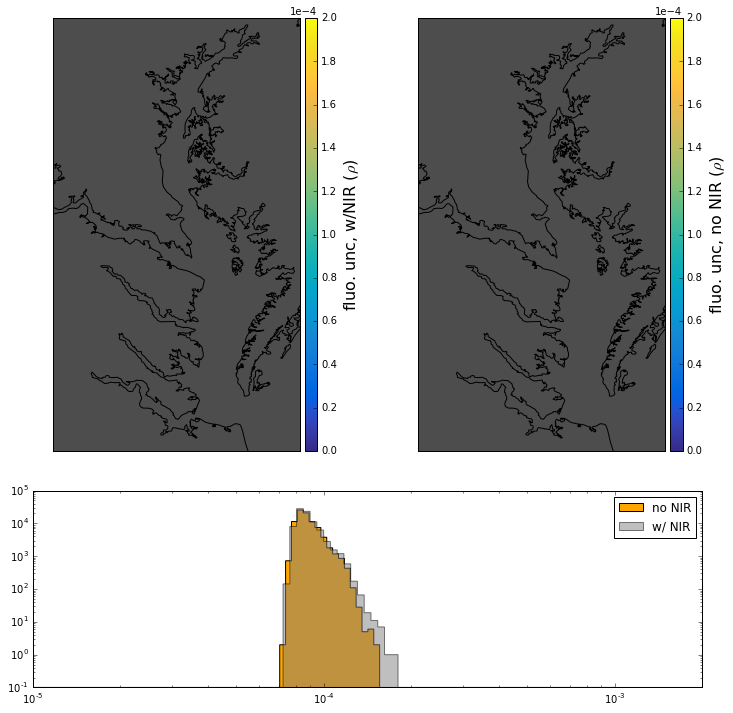

In [120]:
import matplotlib.gridspec as gridspec
# --- COMPARING nflh unc ACROSS RUN TYPES w/chl <0.3
rng2=(0,2e-4)
figsn = pl.figure(figsize=(12,12))
gs = gridspec.GridSpec(3,2)
ax1 = pl.subplot(gs[:-1,0])
ax2 = pl.subplot(gs[:-1,1])
ax3 = pl.subplot(gs[2,:])
# --- MAP1: w/ NIR ----------
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax1)
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn = pl.cm.ScalarMappable()
ssn.set_cmap(parula)
ssn.set_clim(rng2)
imnflhUncStdchl03 = msn.pcolormesh(lons,lats,nflh_unc_rho_std_chl03,cmap=ssn.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsn = msn.colorbar(imnflhUncStdchl03);
cbsn.set_label(r'fluo. unc, w/NIR ($\rho$)',size=16)
cbsn.formatter.set_powerlimits((-1,3))
cbsn.update_ticks()
# --- MAP2: no NIR ---------
msnl = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax2)
msnl.drawmapboundary(fill_color='0.3')
msnl.drawcoastlines()
ssnl = pl.cm.ScalarMappable()
ssnl.set_cmap(parula)
ssnl.set_clim(rng2)
imnflhUncNoNirchl03 = msnl.pcolormesh(lons,lats,nflh_unc_rho_nonir_chl03,cmap=ssnl.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsnl = msnl.colorbar(imnflhUncNoNirchl03);
cbsnl.set_label(r'fluo. unc, no NIR ($\rho$)',size=16)
cbsnl.formatter.set_powerlimits((-1,3))
cbsnl.update_ticks()
#----- Histograms -------------
l1=np.logspace(np.log10(1e-5),np.log10(1e-3),100)
l2=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
ax3.hist(nflh_unc_rho_nonir_chl03.compressed(),bins=l1,range=(1e-5,1e-3),
         color='orange',histtype='stepfilled',log=True,label='no NIR')
ax3.hist(nflh_unc_rho_std_chl03.compressed(),bins=l2,range=(1e-5,2e-3),
         color='gray',alpha=0.5,histtype='stepfilled',log=True,label='w/ NIR');
ax3.semilogx(basex=10)
ax3.set_xlim(xmax=2e-3)
ax3.legend()

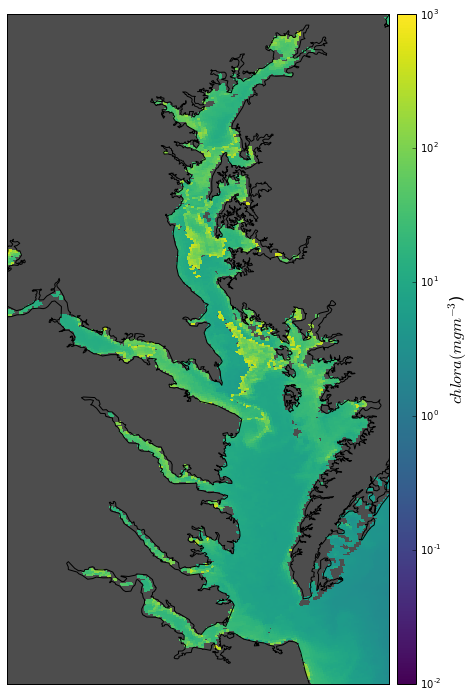

In [124]:
rngchl=(1e-2,1000)
figchl,axchl = pl.subplots(figsize=(8,12))
mschl = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axchl)
mschl.drawmapboundary(fill_color='0.3')
mschl.drawcoastlines()
schl = pl.cm.ScalarMappable()
schl.set_cmap(pl.cm.viridis)
schl.set_clim(rng2)
imchl = mschl.pcolormesh(lons,lats,chlora,cmap=schl.cmap,latlon=True,
                          norm=colors.LogNorm(vmin=rngchl[0],vmax=rngchl[1]))
cbchl = mschl.colorbar(imchl);
cbchl.set_label(r'$chlora(mgm^{-3}$)',size=16)
#cbchl.formatter.set_powerlimits((-1,3))
#cbchl.update_ticks()

In [125]:
figchl.savefig('./fluoResults/chl.png')

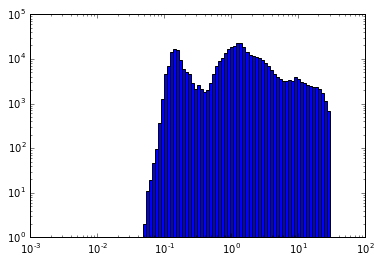

In [112]:
lbchl=np.logspace(np.log10(1e-3),np.log10(30),100)
pl.hist(chlora.compressed(),bins=lbchl,range=(1e-3,30),log=True);
pl.yscale('log')
pl.xscale('log')


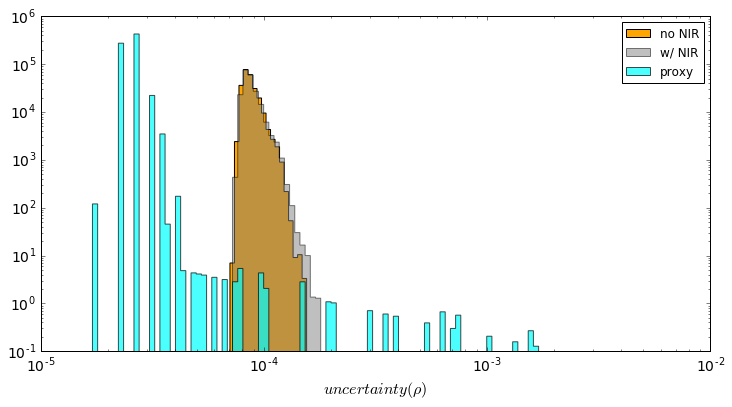

In [140]:
from matplotlib.pylab import rcParams
rcParams['xtick.labelsize']=14
rcParams['ytick.labelsize']=14
fig=pl.figure(figsize=(12,6))
pl.title('')
l1=np.logspace(np.log10(1e-5),np.log10(1e-3),100)
l2=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
pl.hist(nflh_unc_rho_nonir_chl03.compressed(),bins=l1,range=(1e-5,1e-3),normed=True,
         color='orange',histtype='stepfilled',label='no NIR')
pl.hist(nflh_unc_rho_std_chl03.compressed(),bins=l2,range=(1e-5,2e-3),normed=True,
         color='gray',alpha=0.5,histtype='stepfilled',label='w/ NIR');
pl.hist(pnflh_unc_rho_chl03.compressed(),bins=l2,range=(1e-5,2e-3),normed=True,
       color='aqua',alpha=0.7,histtype='stepfilled',label='proxy');
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$uncertainty (\rho)$',fontsize=16)
pl.legend()
fig.savefig('nflh_unc_chlmsk.png')
#pl.ticklabel_format(style='sci',axis='x',scilimits=(-1,3))

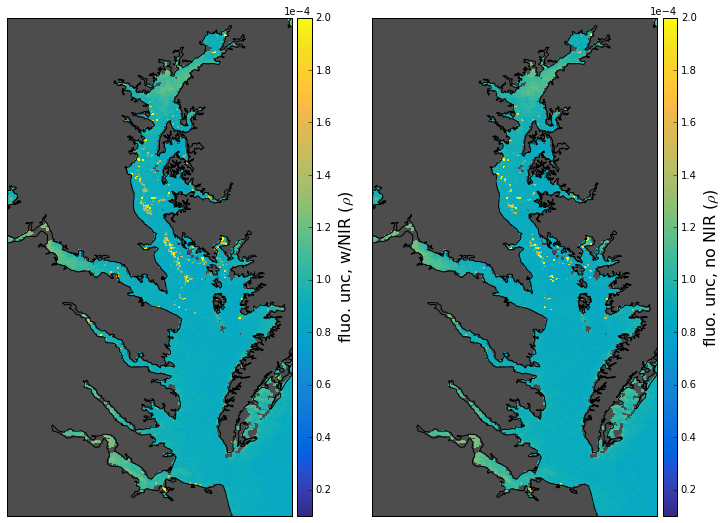

In [66]:
#COMPARING STD RUN NFLH_UNC TO NONIR RUN NFLH_UNC
rng2=(1e-5,2e-4)
figsn,axsn = pl.subplots(ncols=2,figsize=(12,12))
msn = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axsn[0])
msn.drawmapboundary(fill_color='0.3')
msn.drawcoastlines()
ssn = pl.cm.ScalarMappable()
ssn.set_cmap(parula)
ssn.set_clim(rng2)
imnflhUncStd = msn.pcolormesh(lons,lats,nflh_unc_rho_std,cmap=ssn.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsn = msn.colorbar(imnflhUncStd);
cbsn.set_label(r'fluo. unc, w/NIR ($\rho$)',size=16)
cbsn.formatter.set_powerlimits((-1,3))
cbsn.update_ticks()
msnl = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axsn[1])
msnl.drawmapboundary(fill_color='0.3')
msnl.drawcoastlines()
ssnl = pl.cm.ScalarMappable()
ssnl.set_cmap(parula)
ssnl.set_clim(rng2)
imnflhUncNoNir = msnl.pcolormesh(lons,lats,nflh_unc_rho_nonir,cmap=ssnl.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng2[0],vmax=rng2[1]))
cbsnl = msnl.colorbar(imnflhUncNoNir);
cbsnl.set_label(r'fluo. unc, no NIR ($\rho$)',size=16)
cbsnl.formatter.set_powerlimits((-1,3))
cbsnl.update_ticks()

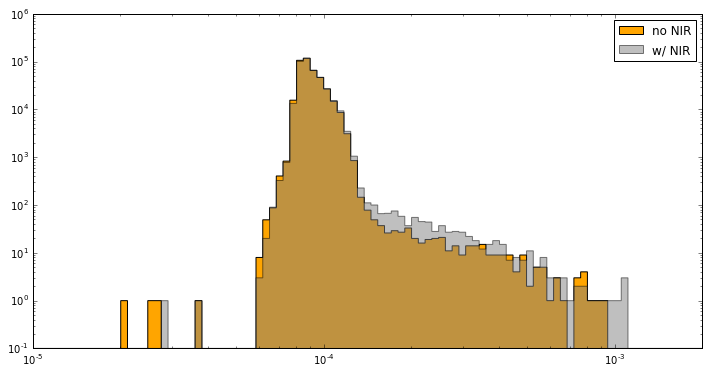

In [54]:
f,ax = pl.subplots(figsize=(12,6))
l1=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
l2=np.logspace(np.log10(1e-5),np.log10(2e-3),100)
ax.hist(nflh_unc_rho_nonir.compressed(),bins=l1,range=(1e-5,1e-3),
        color='orange',histtype='stepfilled',log=True,label='no NIR')
ax.hist(nflh_unc_rho_std.compressed(),bins=l2,range=(1e-5,2e-3),color='gray',
        alpha=0.5,histtype='stepfilled',log=True,label = 'w/ NIR');
ax.semilogx(basex=10)
ax.set_xlim(xmax=2e-3)
ax.legend()

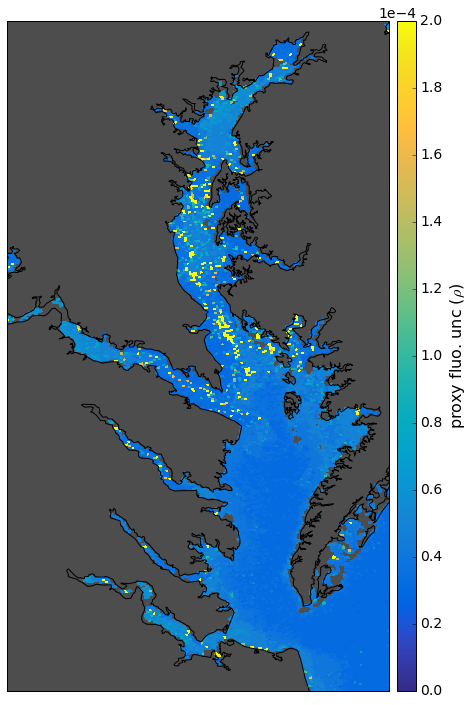

In [43]:
# create fig/axes instance
fontSz=14
rcParams['xtick.labelsize'] = fontSz
rcParams['ytick.labelsize'] = fontSz
fig1,ax = pl.subplots(figsize=(12,12))
#fig,axs = pl.subplots(nrows=2,ncols=2,figsize=(25,22))
# create basemap instance
m1 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax)
rng1=(0,2e-4)
# draw line around projection limb
# color bckgr of map proj. regions.
# missing values over land will show up this color
m1.drawmapboundary(fill_color='0.3')
m1.drawcoastlines()
s1 = pl.cm.ScalarMappable()
s1.set_cmap(parula)
s1.set_clim(rng1)
impnflhUnc = m1.pcolormesh(lons,lats,pnflh_unc_rho,
                        norm=colors.Normalize(vmin=rng1[0],vmax=rng1[1]),
                        cmap=s1.cmap,latlon=True)
cb1 = m1.colorbar(impnflhUnc,"right",size="5%",pad="2%")
cb1.set_label(r'proxy fluo. unc ($\rho$)',size=16)
cb1.formatter.set_powerlimits((-1,3))
cb1.update_ticks()
fig1.savefig('pnflhUnc.png',dpi=300)

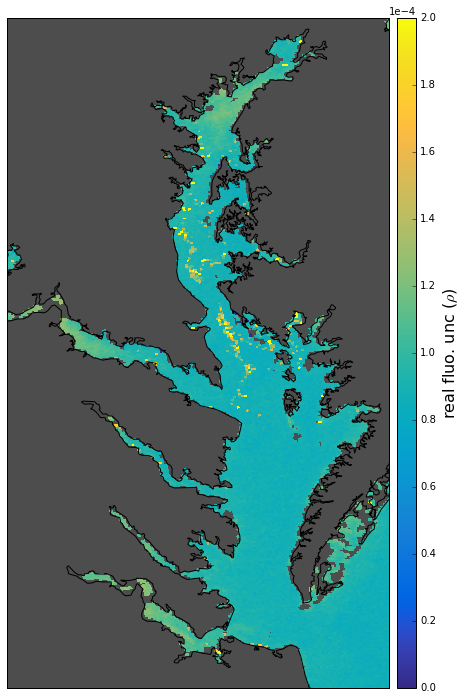

In [94]:
rng1 = (0,2e-4)
fig2,ax2 = pl.subplots(figsize=(12,12))
m2 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax2)
m2.drawmapboundary(fill_color='0.3')
m2.drawcoastlines()
s2 = pl.cm.ScalarMappable()
s2.set_cmap(parula)
s2.set_clim(rng1)
imnflhUnc = m2.pcolormesh(lons,lats,nflh_unc_rho_std,cmap=s2.cmap,latlon=True,
                          norm=colors.Normalize(vmin=rng1[0],vmax=rng1[1]))
cb2 = m2.colorbar(imnflhUnc);
cb2.set_label(r'real fluo. unc ($\rho$)',size=16)
cb2.formatter.set_powerlimits((-1,3))
cb2.update_ticks()
fig2.savefig('nflhUnc.png',dpi=300)

In [46]:
fig.savefig(savedir+'pnflh.png',dpi=300)

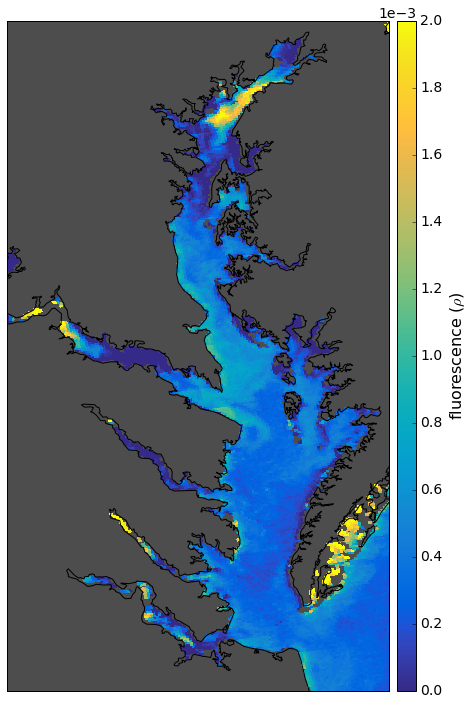

In [66]:
fluoRng=(0,2e-3)
import matplotlib.ticker as ticker
fig5,ax5 = pl.subplots(figsize=(12,12))
m5 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax5)
m5.drawmapboundary(fill_color='0.3')
m5.drawcoastlines()
s5 = pl.cm.ScalarMappable()
s5.set_cmap(parula)
s5.set_clim(fluoRng)

imnflh = m5.pcolormesh(lons,lats,nflhStd_rho,cmap=s5.cmap,latlon=True,
                          norm=colors.Normalize(vmin=fluoRng[0],vmax=fluoRng[1]))
cb5 = m5.colorbar(imnflh);
cb5.set_label(r'fluorescence ($\rho$)',size=16)
cb5.formatter.set_powerlimits((0,3))
cb5.update_ticks()

fig5.savefig('nflhStd.png',dpi=300)

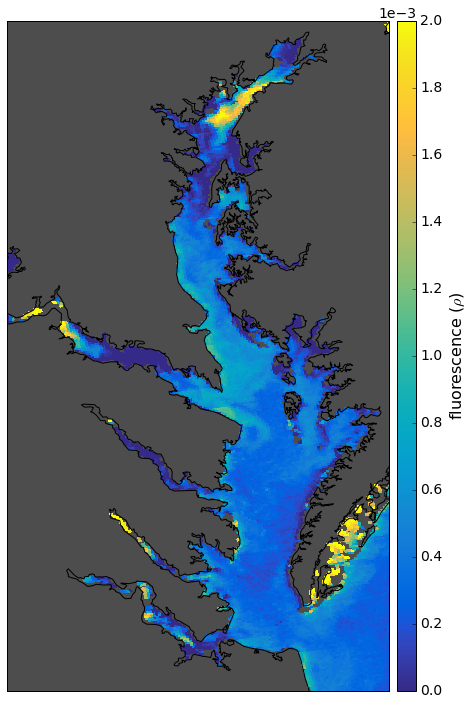

In [40]:
fluoRng=(0,2e-3)
import matplotlib.ticker as ticker
fig4,ax4 = pl.subplots(figsize=(12,12))
m2 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax4)
m2.drawmapboundary(fill_color='0.3')
m2.drawcoastlines()
s2 = pl.cm.ScalarMappable()
s2.set_cmap(parula)
s2.set_clim(fluoRng)

imnflh = m2.pcolormesh(lons,lats,nflh_rho,cmap=s2.cmap,latlon=True,
                          norm=colors.Normalize(vmin=fluoRng[0],vmax=fluoRng[1]))
cb4 = m2.colorbar(imnflh);
cb4.set_label(r'fluorescence ($\rho$)',size=16)
cb4.formatter.set_powerlimits((0,3))
cb4.update_ticks()

fig4.savefig('nflh.png',dpi=300)

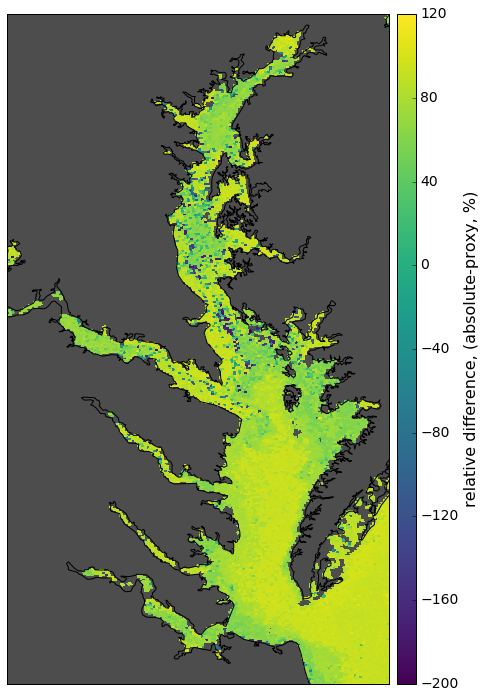

In [41]:
flMetPercDiff = 200* (nflh_unc_direct_rho - pnflh_unc_rho)  / (nflh_unc_direct_rho + pnflh_unc_rho)
fig3,ax3 = pl.subplots(figsize=(12,12))
#fig,axs = pl.subplots(nrows=2,ncols=2,figsize=(25,22))
# create basemap instance
m3 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=ax3)
flPrcDiffRng = (-2e2,1.2e2)

m3.drawmapboundary(fill_color='0.3')
m3.drawcoastlines()
s3 = pl.cm.ScalarMappable()
s3.set_cmap(pl.cm.viridis)
s3.set_clim(flPrcDiffRng)
imFlPrcDif = m3.pcolormesh(lons,lats,flMetPercDiff,
                        norm=colors.Normalize(vmin=flPrcDiffRng[0],vmax=flPrcDiffRng[1]),
                        cmap=s3.cmap,latlon=True)
cb3 = m3.colorbar(imFlPrcDif,"right",size="5%",pad="2%")
cb3.set_label(label='relative difference, (absolute-proxy, %)',size=16)
fig3.savefig('flhreldif.png',dpi=300)

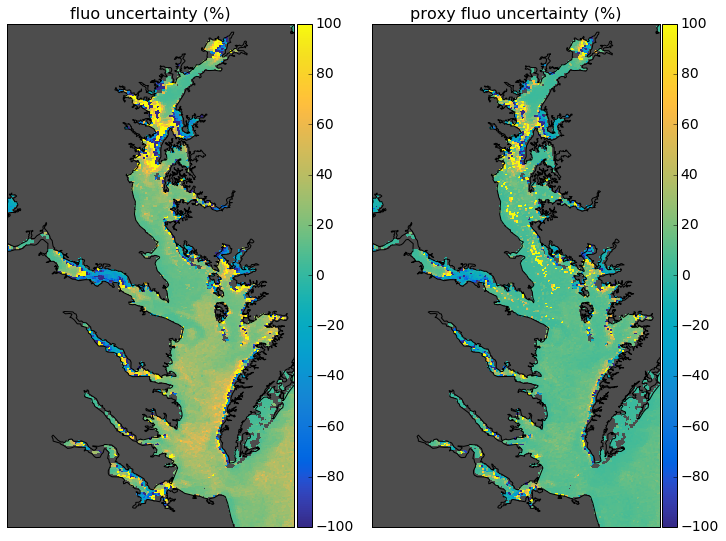

In [62]:
figP,axP = pl.subplots(ncols=2,figsize=(12,12))
rngP=(-100,100)
mP0 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axP[0])
mP0.drawmapboundary(fill_color='0.3')
mP0.drawcoastlines()
sP = pl.cm.ScalarMappable()
sP.set_cmap(parula)
sP.set_clim(rngP)
realPIm = mP0.pcolormesh(lons,lats,nflh_unc_direct_rho/nflh_rho*100,cmap=sP.cmap,
                      norm=colors.Normalize(vmin=rngP[0],vmax=rngP[1]),latlon=True)
cbP0 = mP0.colorbar(realPIm,"right",size='5%',pad='1%')
axP[0].set_title("fluo uncertainty (%)",fontsize=16)
mP1 = Basemap(llcrnrlon=lonRng[0],llcrnrlat=latRng[0],
            urcrnrlon=lonRng[1],urcrnrlat=latRng[1],resolution='h',ax=axP[1])
mP1.drawmapboundary(fill_color='0.3')
mP1.drawcoastlines()
proxPIm = mP1.pcolormesh(lons,lats,pnflh_unc_rho/nflh_rho*100,cmap=sP.cmap,
                       norm=colors.Normalize(vmin=rngP[0],vmax=rngP[1]),latlon=True)
cbP1 = mP1.colorbar(proxPIm,"right",size='5%',pad='1%')
axP[1].set_title("proxy fluo uncertainty (%)",fontsize=16)
#cbfigP=figP.colorbar(proxPIm,ax=axP.ravel().tolist(),aspect=10)

In [63]:
figP.savefig('RelUnc.png',dpi=300)

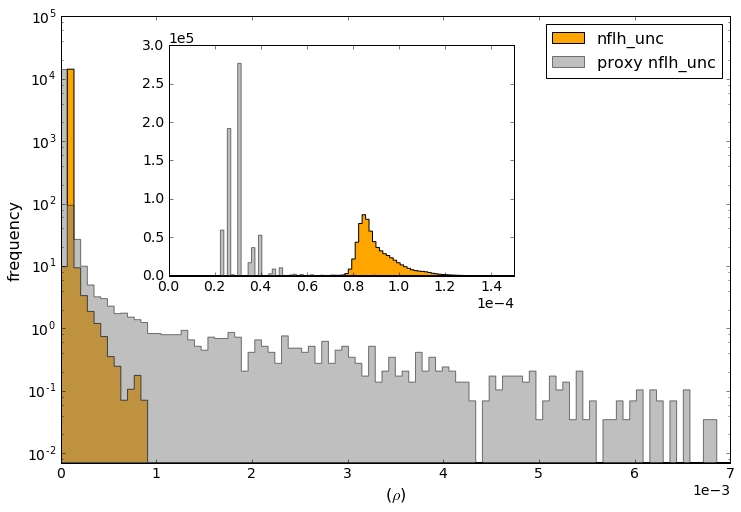

In [48]:
figH,axH = pl.subplots(figsize=(12,8))
rng=(0,7e-3)
axH.ticklabel_format(axis='x',style='sci',scilimits=(1,3))
#axH.set_yscale=('log')
#logBins=np.logspace(np.log10(rng[0]),np.log10(rng[1]),100)
axH.hist(nflh_unc_direct_rho.compressed(),color='orange',label='nflh_unc',
         bins=100,normed=True,histtype='stepfilled',range=rng,log=True);
axH.hist(pnflh_unc_rho.compressed(),color='gray',label='proxy nflh_unc' ,alpha=0.5,
         bins=100,normed=True,histtype='stepfilled',range=rng,log=True);
axH.set_ylim(ymin=7e-3)
axH.legend(fontsize=16)
ax2=figH.add_axes([0.25,0.45,0.4,0.4])
rng2 = (0,1.5e-4)
ax2.hist(nflh_unc_direct_rho.compressed(),color='orange',bins=100,normed=True,
           histtype='stepfilled',range=rng2,log=False)
ax2.hist(pnflh_unc_rho.compressed(),color='gray',bins=100,normed=True,
           histtype='stepfilled',range=rng2,log=False,alpha=0.5)
ax2.set_xlim(rng2)
ax2.ticklabel_format(axis='both',style='sci',scilimits=(1,3))
axH.set_xlabel(r'($\rho$)',fontsize=16)
axH.set_ylabel('frequency',fontsize=16)

In [50]:
figH.savefig('hists.png',dpi=300)